Now that we have completed the implementation in PyTorch, lets also implement it in Keras.
It should be easier(by that I mean shorter) than the PyTorch implementation.

## Datset preparation:

In [1]:
import keras
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


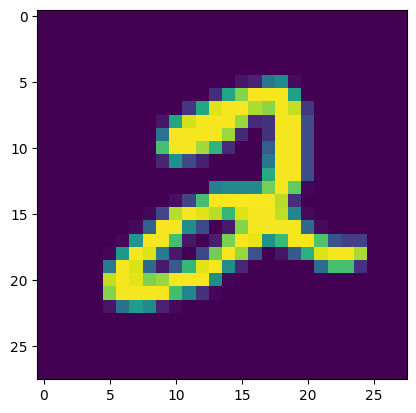

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Preprocessing:

Since there is no information on channels, we need to manually specify that the image has 1 channel. So lets do that for x_train and x_test.

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


Lets normalize the pixel values as well

In [7]:
print(x_train[0])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


**Normalization**:

In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [10]:
y_train[0]

np.uint8(5)

**One Hot Encoding**:

As we can see, the target labels are the actual values.
The output of the final layer of our architecture is a vector of 10 values.

So to make them comparable to calculate the loss, lets do `one-hot-encoding` for target labels

In [11]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

## LeNet Model Architecture:

The documentation specifies the following parameters to be provided:

tf.keras.layers.Conv2D( \\
    filters,   \\
    kernel_size, \\
    strides=(1, 1), \\
    padding='valid', \\
    data_format=None, \\
    dilation_rate=(1, 1), \\
    groups=1, \\
    activation=None, \\
    use_bias=True, \\
    kernel_initializer='glorot_uniform', \\
    bias_initializer='zeros', \\
    kernel_regularizer=None, \\
    bias_regularizer=None, \\
    activity_regularizer=None, \\
    kernel_constraint=None, \\
    bias_constraint=None, \\
    **kwargs \\
)`


In [13]:
!pip install tensorflow

In [14]:
import tensorflow
from keras.layers import MaxPool2D
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

### Model Building:

Lets make a model1 with relu activation function in cnn layers

In [15]:
model1 = Sequential()

model1.add(Conv2D(filters = 6, kernel_size=(5,5), strides = (1,1), padding = 'valid', activation ='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters = 16, kernel_size=(5, 5), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())

model1.add(Dense(120, activation='relu'))
model1.add(Dense(84, activation='relu'))
model1.add(Dense(10, activation='softmax'))

### Model Compilation:

Remember the mnemonic `LOM` from the ANN_Tensorflow.ipynb? LOM as in Loss, optimizer, metrics have to be specified during compilation.

Other parameters can be seen in the documentation: https://keras.io/api/models/model_training_apis/


In [16]:
from keras.metrics import categorical_crossentropy
from keras import optimizers

In [17]:
model1.compile(
    loss = categorical_crossentropy,
    optimizer = optimizers.Adam(),
    metrics = ['Accuracy']
)

### Model Training / Fitting:

We must specify features, labels, batch size, epochs as parameters. Additional parameters can be referred in the documentation as well.

The parameter `validation_data` is the data on which to evaluate the loss and any model metrics at the end of each epoch.

In [18]:
model1.fit(x_train, y_train, batch_size = 128, epochs = 20, verbose = 1, validation_data = (x_test, y_test))


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - Accuracy: 0.8011 - loss: 0.6883 - val_Accuracy: 0.9639 - val_loss: 0.1115
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.9706 - loss: 0.0967 - val_Accuracy: 0.9805 - val_loss: 0.0598
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - Accuracy: 0.9807 - loss: 0.0639 - val_Accuracy: 0.9805 - val_loss: 0.0582
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Accuracy: 0.9838 - loss: 0.0514 - val_Accuracy: 0.9832 - val_loss: 0.0502
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Accuracy: 0.9870 - loss: 0.0412 - val_Accuracy: 0.9878 - val_loss: 0.0377
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Accuracy: 0.9888 - loss: 0.0363 - val_Accuracy: 0.9892 - val_loss: 0.0346
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Accuracy: 0.9906 - loss: 0.0293 - val_Accuracy: 0.9888 - val_loss: 0.0353
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Accuracy: 0.9922 - loss: 0.0249 - val_Accuracy: 

### Model Prediction / Evaluation:

**Prediction**:

Lets try to predict on a sample instance and see if its correct.

In [19]:
import numpy as np
instance = np.expand_dims(x_test[0], axis = 0)
output = model1.predict(instance)
print(output)
print(np.argmax(output))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
[[1.4501036e-12 9.3611052e-10 1.8412342e-10 1.4302480e-10 1.9942874e-11
  8.3851480e-13 1.7023140e-18 1.0000000e+00 1.0895612e-12 2.7182812e-08]]
7


In [20]:
print(y_test[0])
print(np.argmax(y_test[0]))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


Thus the prediction is correct.

**Evaluation**:

To evaluate the overall model on test dataset, we use `model.evaluate`, which requires the features (x_test) and labels (y_test) to be passed as parameters. Other additional parameters can be supplied such as batch_size, steps, etc..

In [21]:
score = model1.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.9863 - loss: 0.0602


In [22]:
print(type(score))

<class 'list'>


In [23]:
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04668277129530907
Test accuracy: 0.9883999824523926


Thus, the LeNet architecture achieves very high accuracy.

## Modified LeNet Architecture:

Notice that we used `relu` activation in the above LeNet architecture. So what if we use `tanh` instead? Lets quickly modify the architecture by using tanh activation function and go through the same steps and compare the accuracy.

In [24]:
model2 = Sequential()

model2.add(Conv2D(filters = 6, kernel_size=(5,5), strides = (1,1), padding = 'valid', activation ='tanh'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters = 16, kernel_size=(5, 5), activation='tanh'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(120, activation='relu'))
model2.add(Dense(84, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [25]:
model2.compile(
    loss = categorical_crossentropy,
    optimizer = optimizers.Adam(),
    metrics = ['Accuracy']
)

In [26]:
model2.fit(x_train, y_train, batch_size = 128, epochs = 20, verbose = 1, validation_data = (x_test, y_test))


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - Accuracy: 0.8088 - loss: 0.6527 - val_Accuracy: 0.9731 - val_loss: 0.0859
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Accuracy: 0.9726 - loss: 0.0881 - val_Accuracy: 0.9800 - val_loss: 0.0613
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Accuracy: 0.9809 - loss: 0.0593 - val_Accuracy: 0.9817 - val_loss: 0.0582
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - Accuracy: 0.9861 - loss: 0.0423 - val_Accuracy: 0.9846 - val_loss: 0.0458
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - Accuracy: 0.9887 - loss: 0.0361 - val_Accuracy: 0.9849 - val_loss: 0.0477
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Accuracy: 0.9915 - loss: 0.0268 - val_Accuracy: 0.9858 - val_loss: 0.0442
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Accuracy: 0.9922 - loss: 0.0236 - val_Accuracy: 0.9880 - val_loss: 0.0411
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Accuracy: 0.9940 - loss: 0.0181 - val_Accuracy: 0

In [27]:
score2 = model2.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.9859 - loss: 0.0694


In [28]:
print("Test loss:", score2[0])
print("Test accuracy:", score2[1])

Test loss: 0.052274126559495926
Test accuracy: 0.989300012588501


Accuracy doesn't vary as much. You may try to experiment some more with the architecture as well.